# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 11.11.2021

Мягий дедлайн: 23:59MSK 23.11.2021

Жестокий дедлайн: 23:59MSK 26.11.2021

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/31332/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

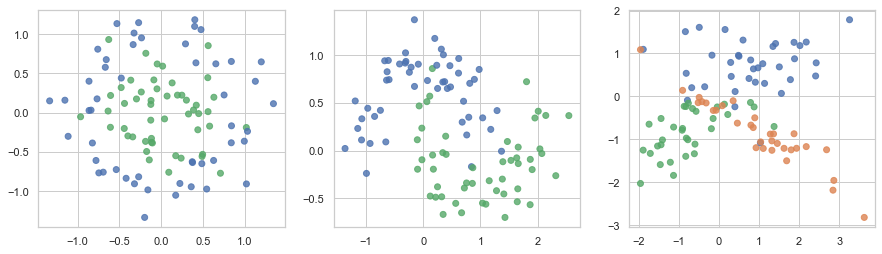

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

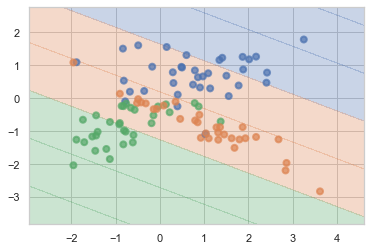

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Accuracy score for Circles is 0.9
Accuracy score for Moons is 0.5
Accuracy score for Classification is 0.9


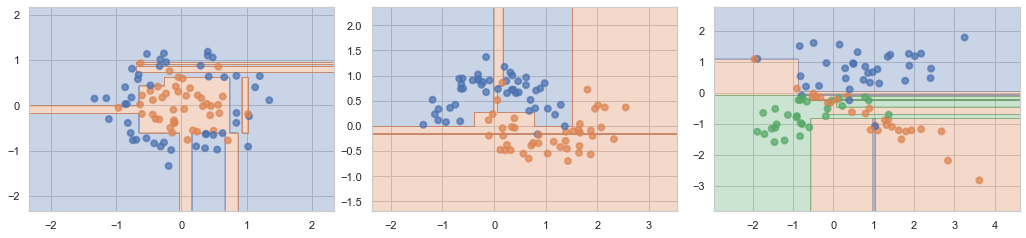

In [7]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

np.random.seed(777)

plt.figure(figsize=(15, 4))

datasets_names=['Circles', 'Moons', 'Classification']

for ind_,dataset in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(*dataset,test_size=0.1, random_state=777, shuffle=True)
    tree = DecisionTreeRegressor().fit(X_train, y_train)
    plt.subplot(1, 3, ind_ + 1)
    print(f'Accuracy score for {datasets_names[ind_]} is {accuracy_score(tree.predict(X_test), y_test)}')
    plot_surface(tree, X_train, y_train)

__Ответ:__ 1 и 3 деревья сильно переобучились

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

Сначала покажем рисунки для наилучших параметров

Best accuracy score for train sample for Circles with params {'max_depth': 8, 'min_samples_leaf': 3} is 0.833
Best accuracy score for test sample for Circles with params {'max_depth': 8, 'min_samples_leaf': 3} is 1.0
Best accuracy score for train sample for Moons with params {'max_depth': 3, 'min_samples_leaf': 3} is 0.922
Best accuracy score for test sample for Moons with params {'max_depth': 3, 'min_samples_leaf': 3} is 0.6
Best accuracy score for train sample for Classification with params {'max_depth': 3, 'min_samples_leaf': 4} is 0.822
Best accuracy score for test sample for Classification with params {'max_depth': 3, 'min_samples_leaf': 4} is 1.0


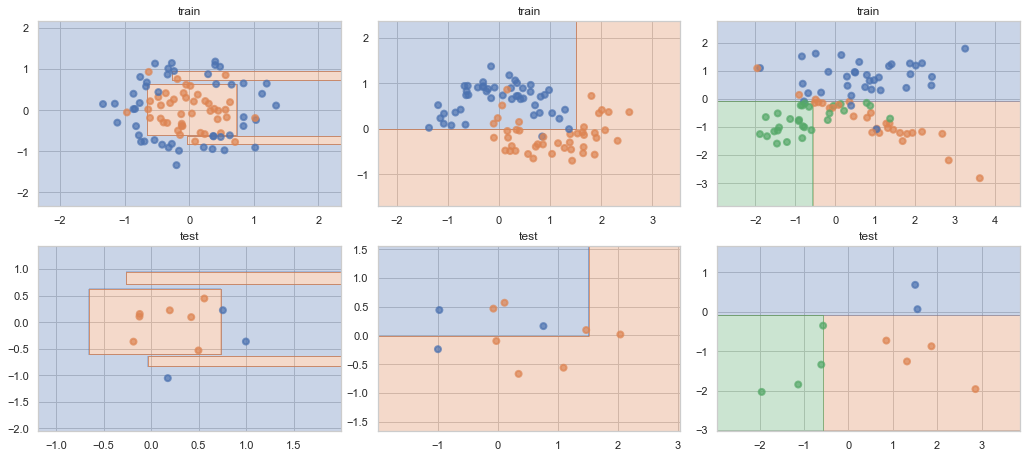

In [8]:
np.random.seed(777)

plt.figure(figsize=(15, 7))

datasets_names=['Circles', 'Moons', 'Classification']

from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':np.arange(3,15,1), 'min_samples_leaf':np.arange(3,15,1)}

parameters_to_view = dict()

for ind_,dataset in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(*dataset,test_size=0.1, random_state=777, shuffle=True)
    tree = DecisionTreeClassifier()
    clf = GridSearchCV(tree, parameters, cv=None, scoring='accuracy', refit=True)
    clf.fit(X_train, y_train)
    
    plt.subplot(2, 3, ind_ + 1)
    print(f'Best accuracy score for train sample for {datasets_names[ind_]} with params {clf.best_params_} is {round(clf.best_score_,3)}')
    print(f'Best accuracy score for test sample for {datasets_names[ind_]} with params {clf.best_params_} is {round(accuracy_score(clf.predict(X_test), y_test),3)}')
    
    for param in clf.best_params_:
        clf.best_params_[param] = np.arange(clf.best_params_[param]-1,clf.best_params_[param]+2,1)
    parameters_to_view[datasets_names[ind_]] = clf.best_params_
    
    plt.title('train')
    plot_surface(clf, X_train, y_train)
    plt.subplot(2, 3, ind_ + 4)
    plt.title('test')
    plot_surface(clf, X_test, y_test)

In [9]:
parameters_to_view['Circles']

{'max_depth': array([7, 8, 9]), 'min_samples_leaf': array([2, 3, 4])}

Теперь построим для каждого, сузив область поизка и посмотрев только крайние точки (слева и справа), чтобы изучить поведение

In [10]:
def plot_surfaces(datasets, parameters_to_view, datasets_names, ind_):
    i = 0
    for max_depth in parameters_to_view[datasets_names[ind_]]['max_depth']:
        for min_samples_leaf in parameters_to_view[datasets_names[ind_]]['min_samples_leaf']:
            i += 1
            X_train, X_test, y_train, y_test = train_test_split(*datasets[ind_],test_size=0.1, random_state=777, shuffle=True)
            tree = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
            tree.fit(X_train, y_train)
            plt.subplot(3, 3, i)
            print(f'Accuracy score for train sample for {datasets_names[ind_]} with params max_depth={max_depth}, min_samples_leaf={min_samples_leaf} is {round(clf.best_score_,3)}')
            print(f'Accuracy score for test sample for {datasets_names[ind_]} with params max_depth={max_depth}, min_samples_leaf={min_samples_leaf} is {round(accuracy_score(clf.predict(X_test), y_test),3)}')
            plt.title(f'max_depth={max_depth}, min_samples_leaf={min_samples_leaf}')
            plot_surface(tree, X_train, y_train)

Accuracy score for train sample for Circles with params max_depth=7, min_samples_leaf=2 is 0.822
Accuracy score for test sample for Circles with params max_depth=7, min_samples_leaf=2 is 0.3
Accuracy score for train sample for Circles with params max_depth=7, min_samples_leaf=3 is 0.822
Accuracy score for test sample for Circles with params max_depth=7, min_samples_leaf=3 is 0.3
Accuracy score for train sample for Circles with params max_depth=7, min_samples_leaf=4 is 0.822
Accuracy score for test sample for Circles with params max_depth=7, min_samples_leaf=4 is 0.3
Accuracy score for train sample for Circles with params max_depth=8, min_samples_leaf=2 is 0.822
Accuracy score for test sample for Circles with params max_depth=8, min_samples_leaf=2 is 0.3
Accuracy score for train sample for Circles with params max_depth=8, min_samples_leaf=3 is 0.822
Accuracy score for test sample for Circles with params max_depth=8, min_samples_leaf=3 is 0.3
Accuracy score for train sample for Circles w

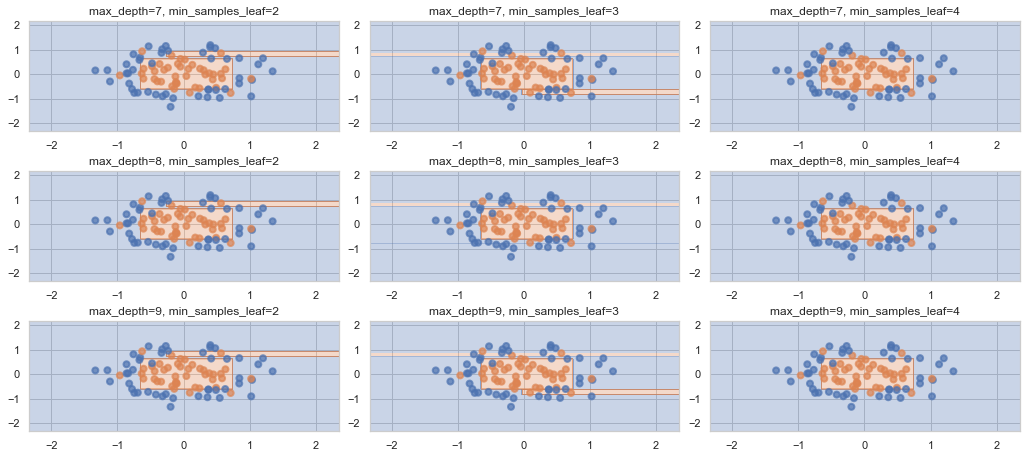

In [11]:
np.random.seed(777)
plt.figure(figsize=(15, 7))
plot_surfaces(datasets, parameters_to_view, datasets_names, 0)

Accuracy score for train sample for Moons with params max_depth=2, min_samples_leaf=2 is 0.822
Accuracy score for test sample for Moons with params max_depth=2, min_samples_leaf=2 is 0.4
Accuracy score for train sample for Moons with params max_depth=2, min_samples_leaf=3 is 0.822
Accuracy score for test sample for Moons with params max_depth=2, min_samples_leaf=3 is 0.4
Accuracy score for train sample for Moons with params max_depth=2, min_samples_leaf=4 is 0.822
Accuracy score for test sample for Moons with params max_depth=2, min_samples_leaf=4 is 0.4
Accuracy score for train sample for Moons with params max_depth=3, min_samples_leaf=2 is 0.822
Accuracy score for test sample for Moons with params max_depth=3, min_samples_leaf=2 is 0.4
Accuracy score for train sample for Moons with params max_depth=3, min_samples_leaf=3 is 0.822
Accuracy score for test sample for Moons with params max_depth=3, min_samples_leaf=3 is 0.4
Accuracy score for train sample for Moons with params max_depth=3

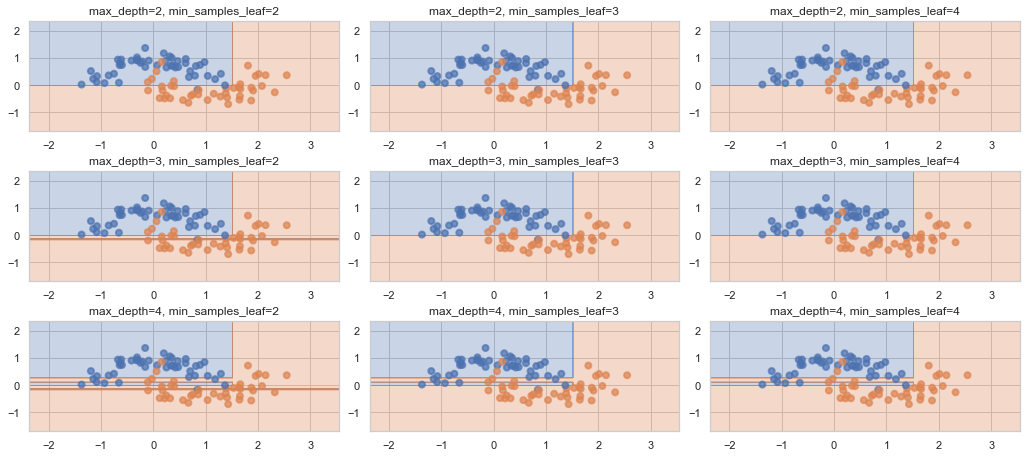

In [12]:
np.random.seed(777)
plt.figure(figsize=(15, 7))
plot_surfaces(datasets, parameters_to_view, datasets_names, 1)

Accuracy score for train sample for Classification with params max_depth=2, min_samples_leaf=3 is 0.822
Accuracy score for test sample for Classification with params max_depth=2, min_samples_leaf=3 is 1.0
Accuracy score for train sample for Classification with params max_depth=2, min_samples_leaf=4 is 0.822
Accuracy score for test sample for Classification with params max_depth=2, min_samples_leaf=4 is 1.0
Accuracy score for train sample for Classification with params max_depth=2, min_samples_leaf=5 is 0.822
Accuracy score for test sample for Classification with params max_depth=2, min_samples_leaf=5 is 1.0
Accuracy score for train sample for Classification with params max_depth=3, min_samples_leaf=3 is 0.822
Accuracy score for test sample for Classification with params max_depth=3, min_samples_leaf=3 is 1.0
Accuracy score for train sample for Classification with params max_depth=3, min_samples_leaf=4 is 0.822
Accuracy score for test sample for Classification with params max_depth=3, m

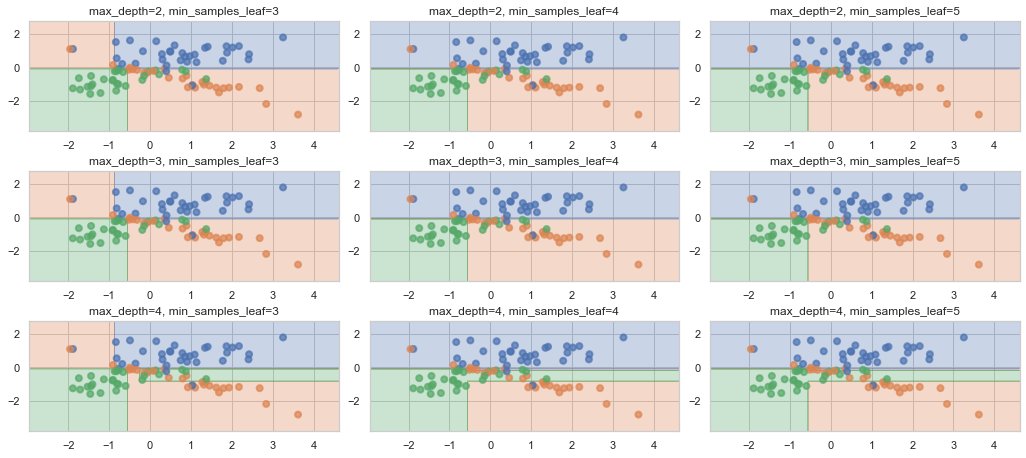

In [13]:
np.random.seed(777)
plt.figure(figsize=(15, 7))
plot_surfaces(datasets, parameters_to_view, datasets_names, 2)

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

Под критерием Джини здесь подразумевается следующая функция:
$$Q(R) = -\frac {|R_l|}{|R|}H(R_l) -\frac {|R_r|}{|R|}H(R_r)$$,
$R$ — множество объектов, $R_l$ и $R_r$ — объекты, попавшие в левое и правое поддерево,
 $H(R) = 1-p_1^2-p_0^2$, $p_1$, $p_0$ — доля объектов класса 1 и 0 соответственно.

Указания:
* Пороги, приводящие к попаданию в одно из поддеревьев пустого множества объектов, не рассматриваются.
* В качестве порогов, нужно брать среднее двух сосдених (при сортировке) значений признака
* Поведение функции в случае константного признака может быть любым.
* При одинаковых приростах Джини нужно выбирать минимальный сплит.
* За наличие в функции циклов балл будет снижен. Векторизуйте! :)

:param feature_vector: вещественнозначный вектор значений признака
:param target_vector: вектор классов объектов,  len(feature_vector) == len(target_vector)

:return thresholds: отсортированный по возрастанию вектор со всеми возможными порогами, по которым объекты можно
 разделить на две различные подвыборки, или поддерева
:return ginis: вектор со значениями критерия Джини для каждого из порогов в thresholds len(ginis) == len(thresholds)
:return threshold_best: оптимальный порог (число)
:return gini_best: оптимальное значение критерия Джини (число)

In [14]:
from hw5code import find_best_split
feature_vector = np.array([1,2,3,4])
target_vector = np.array([0,0,0,1])
find_best_split(feature_vector, target_vector)

(array([1.5, 2.5, 3.5]), [-0.3333333333333333, -0.25, -0.0], 3.5, -0.0)

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2021-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [15]:
df = pd.read_csv('students.csv')
df.head()

STG   SCG   STR   LPR   PEG  UNS
0  0.00  0.00  0.00  0.00  0.00    0
1  0.08  0.08  0.10  0.24  0.90    1
2  0.06  0.06  0.05  0.25  0.33    0
3  0.10  0.10  0.15  0.65  0.30    1
4  0.08  0.08  0.08  0.98  0.24    0

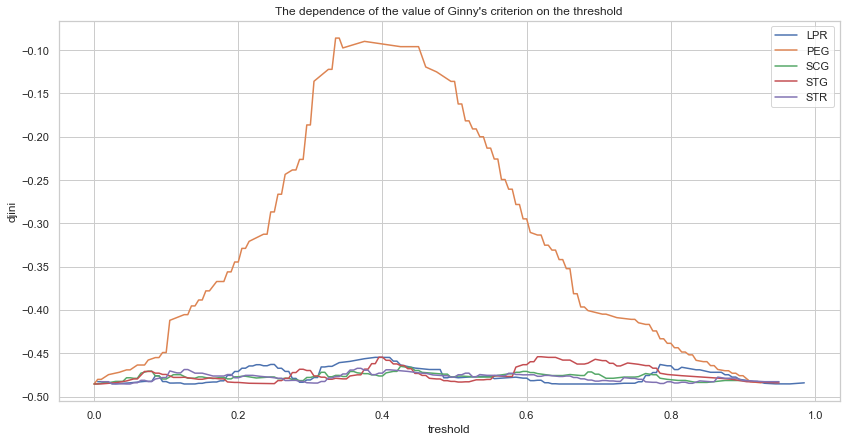

In [16]:
plt.figure(figsize=(14, 7))
for column in df.columns.difference(['UNS']):
    thresholds, djini, best_threshold, opt_ = find_best_split(df[column], df.UNS)
    plt.plot(thresholds, djini)
plt.legend(df.columns.difference(['UNS']))
plt.xlabel('treshold')
plt.ylabel('djini')
plt.title("The dependence of the value of Ginny's criterion on the threshold")
plt.show()

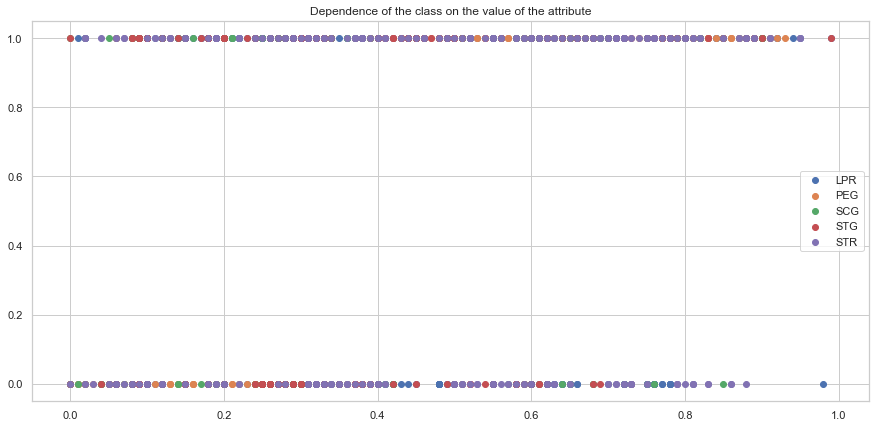

In [17]:
plt.figure(figsize=(15, 7))
for column in df.columns.difference(['UNS']):
    plt.scatter(df[column], df.UNS)
plt.legend(df.columns.difference(['UNS']))
plt.title('Dependence of the class on the value of the attribute')
plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** Деление подвыборки на два поддерева нужно проводить по признаку PEG. Да, согласуется, сразу легко можем сделать хорошее разбиение. "Хорошие" признаки образует кривую - равномерный треугольник, с верхней вершиной в нуле. Кривые, по которым деление почти невозможно будут иметь вид прямой

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

In [21]:
from collections import Counter
feature = 'LPR'
counts = Counter(df.loc[:, feature])
# clicks = Counter(df.loc[sub_y == 1, feature])
print(counts)#, clicks)
# Counter

Counter({0.29: 15, 0.31: 12, 0.78: 10, 0.65: 9, 0.3: 9, 0.33: 8, 0.4: 7, 0.27: 7, 0.18: 7, 0.48: 7, 0.2: 6, 0.49: 6, 0.55: 6, 0.25: 5, 0.76: 5, 0.26: 5, 0.28: 5, 0.09: 5, 0.24: 4, 0.1: 4, 0.72: 4, 0.12: 4, 0.42: 4, 0.19: 4, 0.64: 4, 0.75: 4, 0.62: 4, 0.22: 4, 0.08: 3, 0.14: 3, 0.8: 3, 0.7: 3, 0.6: 3, 0.32: 3, 0.77: 3, 0.61: 3, 0.63: 3, 0.41: 2, 0.15: 2, 0.01: 2, 0.21: 2, 0.84: 2, 0.66: 2, 0.23: 2, 0.81: 2, 0.89: 2, 0.17: 2, 0.11: 2, 0.92: 2, 0.88: 2, 0.87: 2, 0.0: 1, 0.98: 1, 0.35: 1, 0.45: 1, 0.94: 1, 0.43: 1, 0.38: 1, 0.71: 1, 0.51: 1, 0.02: 1, 0.44: 1, 0.37: 1, 0.06: 1, 0.56: 1, 0.95: 1, 0.36: 1, 0.04: 1, 0.53: 1, 0.99: 1, 0.9: 1, 0.16: 1, 0.58: 1, 0.83: 1, 0.5: 1, 0.82: 1, 0.59: 1, 0.91: 1, 0.13: 1, 0.79: 1})


In [149]:
def find_best_split(feature_vector, target_vector):
    sorted_feature_vector = sorted(feature_vector)
    thresholds = ((sorted_feature_vector + np.array([0, *sorted_feature_vector[:-1]]))/2)[1:]
    len_ = len(target_vector)
    djini = []
    for threshold in thresholds:
        mask_l = feature_vector < threshold
        mask_r = ~mask_l
        
        tv_l = target_vector[mask_l]
        len_l = len(tv_l)

        tv_r = target_vector[mask_r]
        len_r = len(tv_r)
        if len_l == 0:
            djini_l = 0
        else:
            p0_l = len(tv_l[tv_l == 0])/len_l
            djini_l = -len_l/len_ * (2*p0_l - 2*p0_l**2) # (1-(1-p0)**2 - p0**2 = 2p0 - 2p0**2)
        if len_r == 0:
            djini_r = 0
        else:
            p0_r = len(tv_r[tv_r == 0])/len_r
            djini_r = - len_r/len_ * (2*p0_r - 2*p0_r**2)
        djini.append(djini_l + djini_r)
    opt_ = max(djini)
    return thresholds, djini, thresholds[djini.index(opt_)], opt_

In [177]:
class DecisionTree:
    def __init__(self, feature_types, max_depth=None, min_samples_split=None, min_samples_leaf=None):
        if np.any(list(map(lambda x: x != "real" and x != "categorical", feature_types))):
            raise ValueError("There is unknown feature type")

        self._tree = {}
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf

    def _fit_node(self, sub_X, sub_y, node):
        if np.all(sub_y == sub_y[0]):
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            return
        feature_best, threshold_best, gini_best, split = None, None, None, None
        for feature in range(1, sub_X.shape[1]):
            feature_type = self._feature_types[feature]
            categories_map = {}

            if feature_type == "real":
                feature_vector = sub_X.iloc[:, feature]
            elif feature_type == "categorical":
                counts = Counter(sub_X.iloc[:, feature])
                clicks = Counter(sub_X.iloc[sub_y == 1, feature])
                ratio = {}
                for key, current_count in counts.items():
                    if key in clicks:
                        current_click = clicks[key]
                    else:
                        current_click = 0
                    ratio[key] = current_count / current_click
                sorted_categories = list(map(lambda x: x[1], sorted(ratio.items(), key=lambda x: x[1])))
                categories_map = dict(zip(sorted_categories, list(range(len(sorted_categories)))))

                feature_vector = np.array(map(lambda x: categories_map[x], sub_X.iloc[:, feature]))
            else:
                raise ValueError

            if len(feature_vector) in [0,1]:
                continue

            _, _, threshold, gini = find_best_split(feature_vector, sub_y)
            if gini_best is None or gini > gini_best:
                feature_best = feature
                gini_best = gini
                split = feature_vector < threshold

                if feature_type == "real":
                    threshold_best = threshold
                elif feature_type == "Categorical":
                    threshold_best = list(map(lambda x: x[0],
                                              filter(lambda x: x[1] < threshold, categories_map.items())))
                else:
                    raise ValueError

        if feature_best is None:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)
            return

        node["type"] = "nonterminal"

        node["feature_split"] = feature_best
        if self._feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
        elif self._feature_types[feature_best] == "categorical":
            node["categories_split"] = threshold_best
        else:
            raise ValueError
        node["left_child"], node["right_child"] = {}, {}
        self._fit_node(sub_X[split], sub_y[split], node["left_child"])
        self._fit_node(sub_X[np.logical_not(split)], sub_y[np.logical_not(split)], node["right_child"])

In [178]:
tree = DecisionTree(["real"]*(df.shape[1]-1))

In [179]:
node = {}
node["type"] = "root"
tree._fit_node(df.drop('UNS', axis=1), np.array(df.UNS.tolist()), node)

here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here


__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [17]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [18]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    

__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**

Вставьте что угодно, описывающее ваши впечатления от этого задания: